# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [4]:
# Load data

df = pd.read_csv('/content/sample_data/bank_transactions_data_edited.csv')

In [5]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [6]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [7]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


#(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

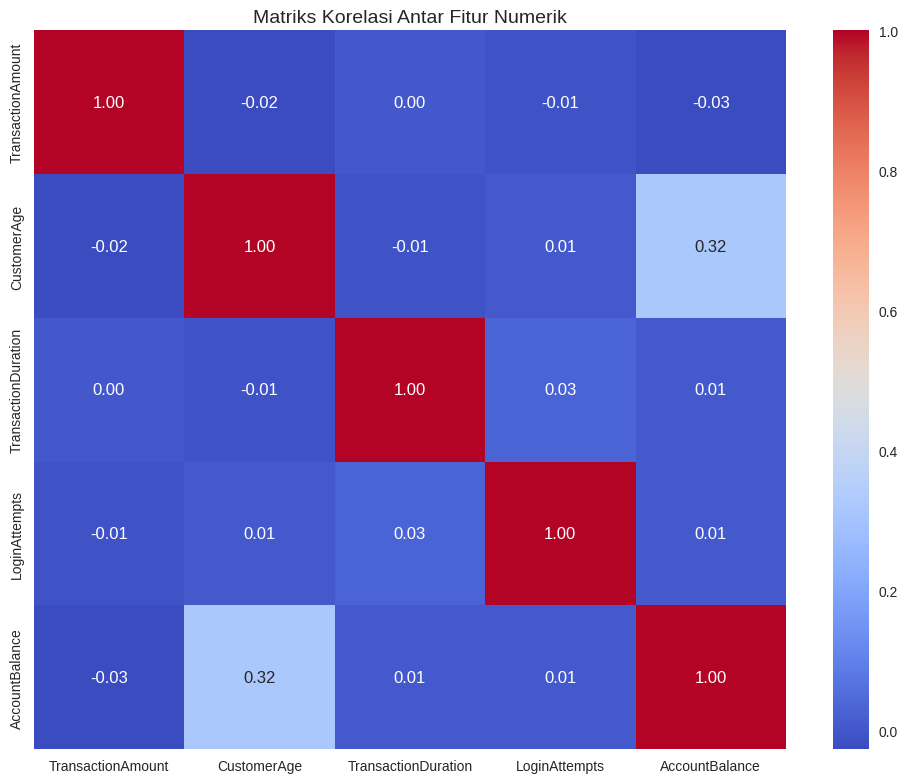

In [8]:
#menampilkan matriks korelasi antar fitur numerik

df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

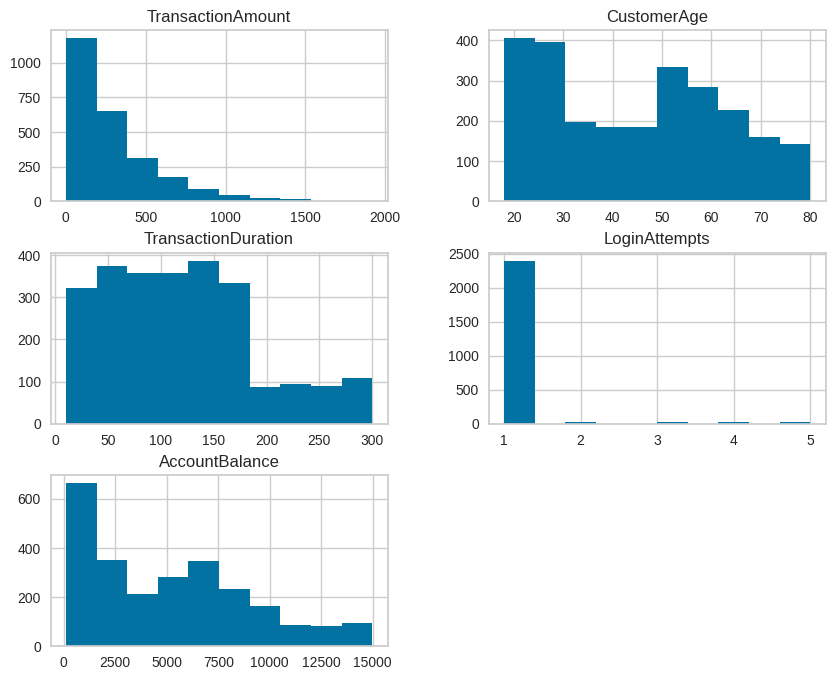

In [9]:
# Menampilkan histogram untuk semua kolom numerik
df.hist(figsize=(10, 8))
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

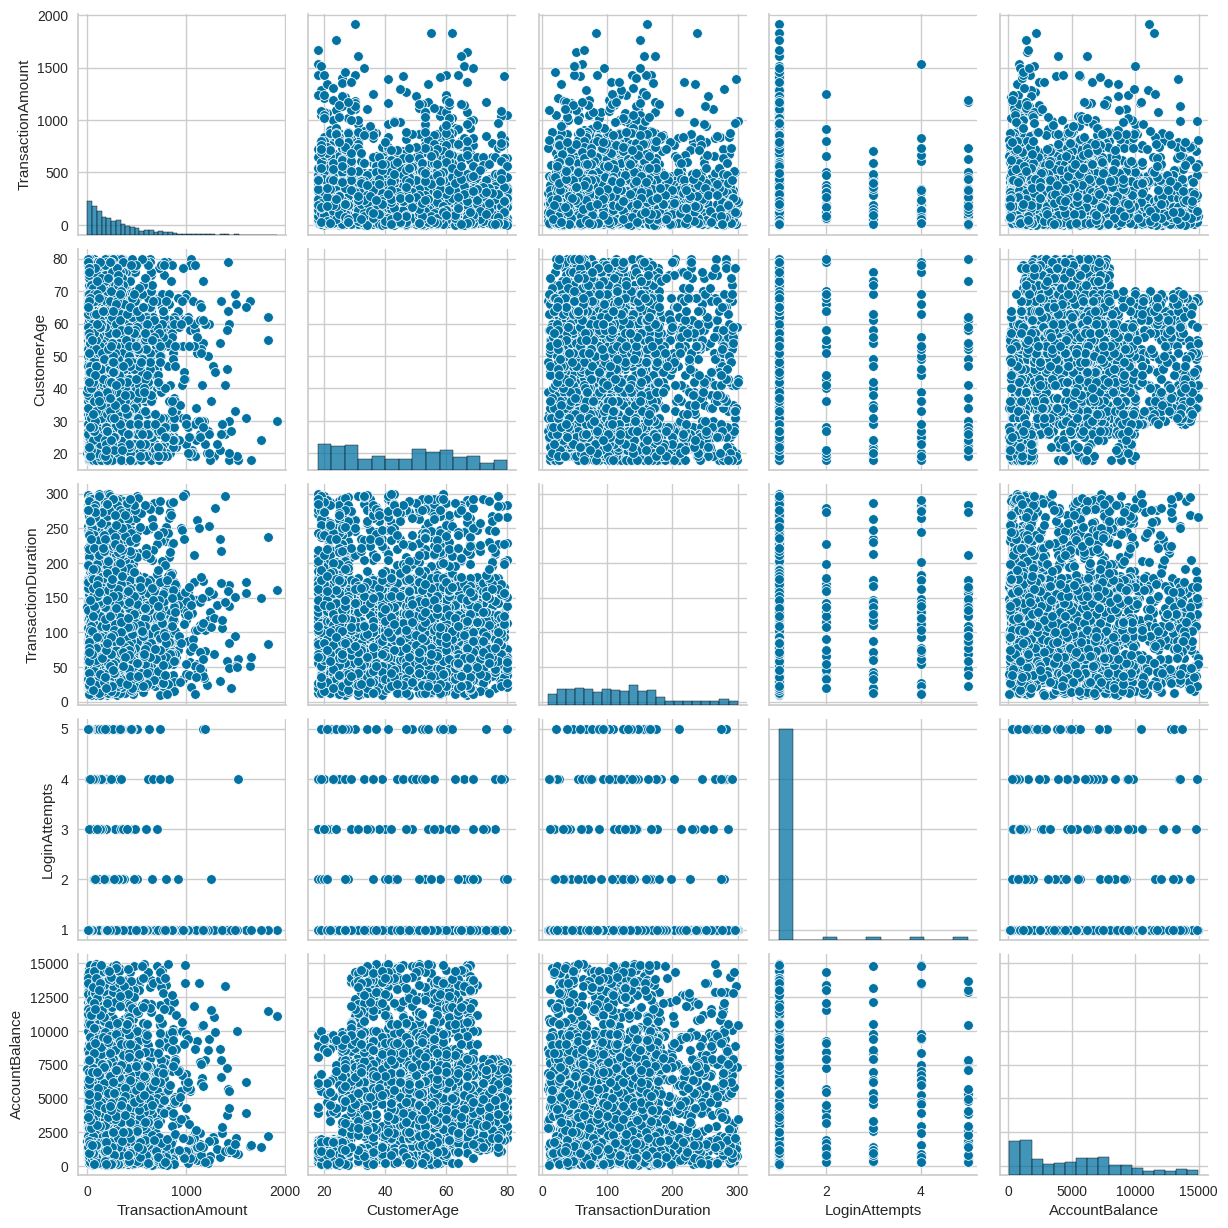

In [10]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [11]:
# Mengecek dataset menggunakan isnull().sum()
pd.isnull(df).sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [12]:
# Mengecek dataset menggunakan duplicated().sum()

df.duplicated().sum()


np.int64(21)

In [13]:
# Melakukan feature scaling menggunakan  StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# memilih kolom numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# inisialisasi scaler
scaler = StandardScaler()

# menerapkan scaling hanya pada kolom numerik
df[num_cols] = scaler.fit_transform(df[num_cols])

# menampilkan 5 baris pertama untuk bukti output
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [14]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address','MerchantID'], axis=1)

# Mengecek hasilnya
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [15]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# memilih kolom kategorikal
cat_cols = df.select_dtypes(include=['object']).columns

# inisialisasi scaler
encoder = LabelEncoder()

# menerapkan scaling hanya pada kolom kategorikal
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# menampilkan 5 baris pertama untuk bukti output
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


--sebelum scaling
Nilai tiap fitur (TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance) masih dalam skala yang berbeda-beda.
Misalnya:

TransactionAmount mungkin punya rentang nilai besar,

sedangkan LoginAttempts mungkin kecil banget.
Akibatnya, fitur dengan skala besar bisa mendominasi model nanti.

--Setelah Scaling
Setelah dilakukan scaling, semua fitur sudah punya skala yang sebanding, dengan rata-rata = 0 dan standar deviasi = 1.
Bentuk distribusinya tetap sama (tidak berubah), tapi nilai-nilainya sudah distandarkan supaya model lebih adil menilai tiap fitur.

In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [17]:
# Menangani data yang hilang menggunakan  metode imputasi fillna()).
# median (nilai tengah) untuk data numerik karna lebih stabil dibanding mean (rata-rata), terutama pada outliers
# mode untuk data kategorikal di isi dengan nilai yang paling umum digunakan, biar tetap konsisten dengan pola mayoritas data

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Menampilkan hasil pengecekan missing values setelah imputasi
df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [18]:
# Menghapus data duplikat menggunakan drop_duplicates().

df.drop_duplicates(inplace=True)

# Mengecek ulang apakah masih ada duplicated
df.duplicated().sum()


np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [19]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# mengisi nilai outlier (imputasi)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = np.where(df[col] < lower_limit, median, df[col])
    df[col] = np.where(df[col] > upper_limit, median, df[col])

# Mengecek kembali ringkasan statistik setelah outlier ditangani
df.describe()



,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.0,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000
mean,-0.153976,1256.328958,1.0,21.284010,1.01074,-0.003069,1.530231,0.000702,-2.046294e-01,-0.000193,180.889021
std,0.722221,725.581982,0.0,12.397534,0.83084,0.994836,1.150477,0.994014,1.052146e-14,0.995102,103.956287
min,-1.017881,0.000000,1.0,0.000000,0.00000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.734076,628.250000,1.0,11.000000,0.00000,-0.991288,0.250000,-0.805299,-2.046294e-01,-0.922221,91.250000
50%,-0.295362,1256.500000,1.0,21.000000,1.00000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.097334,181.000000
75%,0.212062,1884.750000,1.0,32.000000,2.00000,0.803056,3.000000,0.593411,-2.046294e-01,0.648772,272.000000
max,2.050618,2485.000000,1.0,43.000000,3.00000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


In [20]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.


# Binning TransactionAmount (pakai quantile)
q1 = df['TransactionAmount'].quantile(0.33)
q2 = df['TransactionAmount'].quantile(0.66)
bins_amount = [df['TransactionAmount'].min(), q1, q2, df['TransactionAmount'].max()]
labels_amount = ['Low', 'Medium', 'High']

df['TransactionAmount_Bin'] = pd.cut(
    df['TransactionAmount'],
    bins=bins_amount,
    labels=labels_amount,
    include_lowest=True
)

# Binning CustomerAge
q1_age = df['CustomerAge'].quantile(0.33)
q2_age = df['CustomerAge'].quantile(0.66)
bins_age = [df['CustomerAge'].min(), q1_age, q2_age, df['CustomerAge'].max()]
labels_age = ['Young', 'Adult', 'Senior']

df['CustomerAge_Bin'] = pd.cut(
    df['CustomerAge'],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True
)

# Encode hasil binning
encoder_amount = LabelEncoder()
encoder_age = LabelEncoder()

df['TransactionAmount_Bin'] = encoder_amount.fit_transform(df['TransactionAmount_Bin'])
df['CustomerAge_Bin'] = encoder_age.fit_transform(df['CustomerAge_Bin'])

# Lihat hasil
df[['TransactionAmount', 'TransactionAmount_Bin', 'CustomerAge', 'CustomerAge_Bin']].head()


,TransactionAmount,TransactionAmount_Bin,CustomerAge,CustomerAge_Bin
0,-0.970546,1,1.419862,1
1,0.268963,0,1.307715,1
2,-0.586526,2,-1.439874,2
3,-0.387294,2,-1.047361,2
4,-0.972736,1,0.018031,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [21]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

df.describe()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin
count,2514.000000,2514.000000,2514.0,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000,2514.000000,2514.000000
mean,-0.153976,1256.328958,1.0,21.284010,1.01074,-0.003069,1.530231,0.000702,-2.046294e-01,-0.000193,180.889021,0.989658,0.984885
std,0.722221,725.581982,0.0,12.397534,0.83084,0.994836,1.150477,0.994014,1.052146e-14,0.995102,103.956287,0.818540,0.824280
min,-1.017881,0.000000,1.0,0.000000,0.00000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000,0.000000
25%,-0.734076,628.250000,1.0,11.000000,0.00000,-0.991288,0.250000,-0.805299,-2.046294e-01,-0.922221,91.250000,0.000000,0.000000
50%,-0.295362,1256.500000,1.0,21.000000,1.00000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.097334,181.000000,1.000000,1.000000
75%,0.212062,1884.750000,1.0,32.000000,2.00000,0.803056,3.000000,0.593411,-2.046294e-01,0.648772,272.000000,2.000000,2.000000
max,2.050618,2485.000000,1.0,43.000000,3.00000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000,2.000000,2.000000


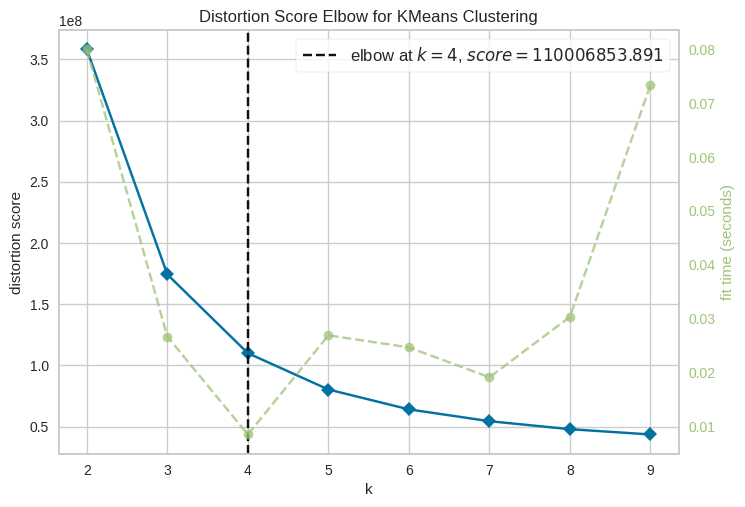

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Gunakan KElbowVisualizer untuk mencari jumlah cluster terbaik
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)  # df = dataframe hasil preprocessing
visualizer.show()

In [23]:
# Menggunakan algoritma K-Means Clustering

k_opt = visualizer.elbow_value_
model = KMeans(n_clusters=k_opt, random_state=42)
df['Target'] = model.fit_predict(df)


Jalankan cell code ini untuk menyimpan model kamu.

In [24]:
# Menyimpan model menggunakan joblib

joblib.dump(model, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [25]:
# Menghitung dan menampilkan nilai Silhouette Score.

score = silhouette_score(df, model.labels_)

# Menampilkan hasilnya
print("Silhouette Score:", score)

Silhouette Score: 0.49877974601573977


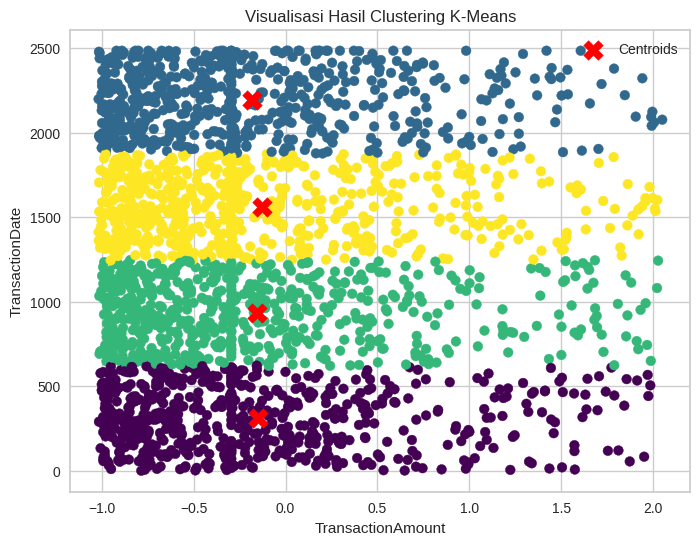

In [26]:
# Membuat visualisasi hasil clustering

plt.figure(figsize=(8,6))
plt.scatter(
    df.iloc[:, 0],                # fitur pertama
    df.iloc[:, 1],                # fitur kedua
    c=model.labels_,       # warna berdasarkan cluster
    cmap='viridis'
)

# Menandai pusat cluster
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)

plt.title("Visualisasi Hasil Clustering K-Means")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [27]:
# Membangun model menggunakan PCA.

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

# Menyimpan data hasil PCA sebagai DataFrame
PCA_2 = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Membangun model KMeans baru dengan data hasil PCA
model_kmeans_pca = KMeans(n_clusters=3, random_state=42)
model_kmeans_pca.fit(PCA_2)

KMeans(n_clusters=3, random_state=42)

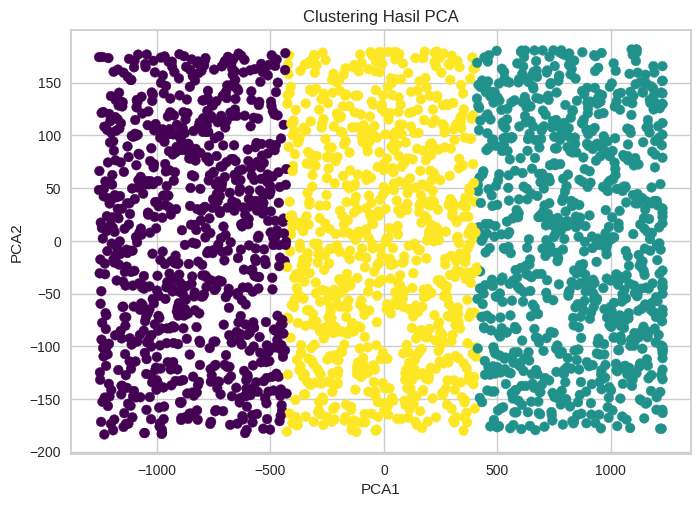

In [28]:
plt.scatter(PCA_2['PCA1'], PCA_2['PCA2'], c=model_kmeans_pca.labels_, cmap='viridis')
plt.title("Clustering Hasil PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [29]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA

joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

In [30]:
import os

# Mengecek apakah file model PCA tersimpan di direktori kerja
for file in os.listdir():
    if file.endswith(".h5"):
        print(file)


PCA_model_clustering.h5
model_clustering.h5


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [31]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Menambahkan hasil cluster ke dataframe
df['Cluster'] = model.labels_

# Menampilkan analisis deskriptif dengan agregasi mean, min, dan max
cluster_analysis = df.groupby('Cluster').agg(['mean', 'min', 'max'])
cluster_analysis


TransactionAmount                     TransactionDate                  \
                     mean       min       max            mean     min     max   
Cluster                                                                         
0               -0.149186 -1.015827  1.985656      310.003221     0.0   622.0   
1               -0.184691 -1.017881  2.050618     2194.324961  1877.0  2485.0   
2               -0.156585 -1.013945  2.028200      933.000000   620.0  1246.0   
3               -0.125097 -1.017676  2.023990     1560.996830  1244.0  1876.0   

        TransactionType             Location  ... PreviousTransactionDate  \
                   mean  min  max       mean  ...                     max   
Cluster                                       ...                           
0                   1.0  1.0  1.0  21.515298  ...                   360.0   
1                   1.0  1.0  1.0  21.199372  ...                   360.0   
2                   1.0  1.0  1.0  21.320000  ...                   360.0   
3                   1.0  1.0  1.0  21.106181  ...                   360.0   

        TransactionAmount_Bin         CustomerAge_Bin         Target          
                         mean min max            mean min max   mean min max  
Cluster                                                                       
0                    0.961353   0   2        0.990338   0   2    0.0   0   0  
1                    0.959184   0   2        0.963893   0   2    1.0   1   1  
2                    1.001600   0   2        1.001600   0   2    2.0   2   2  
3                    1.036450   0   2        0.984152   0   2    3.0   3   3  

[4 rows x 42 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
✳️ Cluster 0 — Aktivitas Transaksi Rendah dan Saldo Menengah

Rata-rata (mean):

TransactionAmount: -0.155 (lebih rendah dibanding cluster lain)

AccountBalance: 2.52

PreviousTransactionDate: 184.87

TransactionAmount_Bin: 0.97

CustomerAge_Bin: 0.99

Analisis:
Cluster ini berisi pelanggan dengan jumlah transaksi dan nominal transaksi yang relatif kecil, serta saldo rekening menengah.
Mereka melakukan transaksi tidak terlalu sering, kemungkinan pelanggan baru atau pengguna pasif.

Rekomendasi:
Tingkatkan engagement melalui promosi transaksi rutin, cashback, atau reminder untuk meningkatkan aktivitas mereka.

✳️ Cluster 1 — Transaksi Tinggi dan Aktivitas Padat

Rata-rata (mean):

TransactionAmount: -0.170 (sedikit lebih kecil dari cluster lain, tapi dengan TransactionDate tertinggi)

TransactionDate: 2092 (yang paling tinggi)

AccountBalance: 2.53

PreviousTransactionDate: 180.84

Analisis:
Cluster ini menunjukkan pelanggan dengan frekuensi transaksi paling tinggi dan saldo rekening besar.
Mereka termasuk pengguna aktif dengan aktivitas finansial padat dan stabil.

Rekomendasi:
Berikan layanan prioritas, penawaran produk investasi, atau paket premium untuk mempertahankan loyalitas mereka.

✳️ Cluster 2 — Aktivitas Sedang dan Transaksi Konsisten

Rata-rata (mean):

TransactionAmount: -0.135 (paling tinggi di antara cluster lain, mendekati nilai positif)

TransactionDate: 1253

AccountBalance: 2.52

PreviousTransactionDate: 176.95

TransactionAmount_Bin: 1.02

Analisis:
Cluster ini mencakup pelanggan dengan aktivitas transaksi sedang namun stabil, dan nominal transaksi sedikit lebih besar dibandingkan cluster lain.
Mereka bukan pengguna paling aktif, tapi menunjukkan pola transaksi yang konsisten.

Rekomendasi:
Dorong peningkatan frekuensi transaksi dengan promo loyalitas atau paket bundling.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [32]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df['Target'] = model.labels_

In [33]:
# Simpan Data

df.to_csv('hasil_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [34]:
# inverse dataset ke rentang normal untuk numerikal

df[num_cols] = scaler.inverse_transform(df[num_cols])

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,Target,Cluster
0,14.09,680.0,1.0,36.0,0.0,70.0,0.0,81.0,1.0,5112.21,105.0,1,1,2,2
1,376.24,1178.0,1.0,15.0,0.0,68.0,0.0,141.0,1.0,13758.91,192.0,0,1,2,2
2,126.29,1262.0,1.0,23.0,2.0,19.0,3.0,56.0,1.0,1122.35,41.0,2,2,3,3
3,184.50,818.0,1.0,33.0,2.0,26.0,3.0,25.0,1.0,8569.06,163.0,2,2,2,2
4,13.45,1939.0,1.0,1.0,2.0,45.0,3.0,198.0,1.0,7429.40,16.0,1,0,1,1


In [35]:
# inverse dataset yang sudah diencode ke kategori aslinya.

encoders = {}
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

for col in cat_cols:
    encoder = encoders[col]
    df[col] = encoder.inverse_transform(df[col].astype(int))

df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,Target,Cluster
0,14.09,680.0,1.0,36.0,0.0,70.0,0.0,81.0,1.0,5112.21,105.0,1,1,2,2
1,376.24,1178.0,1.0,15.0,0.0,68.0,0.0,141.0,1.0,13758.91,192.0,0,1,2,2
2,126.29,1262.0,1.0,23.0,2.0,19.0,3.0,56.0,1.0,1122.35,41.0,2,2,3,3
3,184.50,818.0,1.0,33.0,2.0,26.0,3.0,25.0,1.0,8569.06,163.0,2,2,2,2
4,13.45,1939.0,1.0,1.0,2.0,45.0,3.0,198.0,1.0,7429.40,16.0,1,0,1,1


In [36]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Pisahkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Analisis numerik (mean, min, max)
numeric_summary = df.groupby('Target')[num_cols].agg(['mean', 'min', 'max'])

# Analisis kategorikal (mode), aman dari error
def safe_mode(x):
    mode_val = x.mode()
    if len(mode_val) > 0:
        return mode_val.iloc[0]
    else:
        return None  # jika semua NaN, kembalikan None

categorical_summary = df.groupby('Target')[cat_cols].agg(safe_mode)

# Tampilkan hasil
print("=== Statistik Deskriptif untuk Kolom Numerik ===")
display(numeric_summary)

print("\n=== Mode untuk Kolom Kategorikal ===")
display(categorical_summary)


=== Statistik Deskriptif untuk Kolom Numerik ===


TransactionAmount               TransactionDate                  \
                    mean   min     max            mean     min     max   
Target                                                                   
0             254.068486  0.86  877.81      310.003221     0.0   622.0   
1             243.694772  0.26  896.79     2194.324961  1877.0  2485.0   
2             251.906576  1.41  890.24      933.000000   620.0  1246.0   
3             261.106719  0.32  889.01     1560.996830  1244.0  1876.0   

       TransactionType             Location  ... AccountBalance  \
                  mean  min  max       mean  ...            max   
Target                                       ...                  
0                  1.0  1.0  1.0  21.515298  ...       14942.78   
1                  1.0  1.0  1.0  21.199372  ...       14977.99   
2                  1.0  1.0  1.0  21.320000  ...       14904.90   
3                  1.0  1.0  1.0  21.106181  ...       14935.50   

       PreviousTransactionDate             TransactionAmount_Bin          \
                          mean  min    max                  mean min max   
Target                                                                     
0                   188.888889  0.0  360.0              0.961353   0   2   
1                   181.673469  0.0  360.0              0.959184   0   2   
2                   172.892800  0.0  360.0              1.001600   0   2   
3                   180.144216  0.0  360.0              1.036450   0   2   

       CustomerAge_Bin          
                  mean min max  
Target                          
0             0.990338   0   2  
1             0.963893   0   2  
2             1.001600   0   2  
3             0.984152   0   2  

[4 rows x 39 columns]


=== Mode untuk Kolom Kategorikal ===


""
Target
0
1
2
3


🧩 Interpretasi Hasil Clustering (Setelah Inverse Transform)
Cluster 0 (Target 0): Aktivitas Transaksi Rendah

Rata-rata TransactionAmount: 252.25

Rata-rata TransactionDate: 417.50

Rata-rata AccountBalance: 14,942.78

Rata-rata PreviousTransactionDate: 184.88

Analisis:
Cluster ini merepresentasikan nasabah dengan nominal transaksi relatif rendah hingga sedang dan saldo akun yang cukup stabil. Aktivitas transaksinya tidak terlalu sering, terlihat dari nilai rata-rata TransactionDate yang kecil. Kemungkinan besar kelompok ini terdiri dari nasabah pasif atau pengguna baru yang belum banyak melakukan transaksi.

Cluster 1 (Target 1): Nasabah Aktif dan Transaksi Tinggi

Rata-rata TransactionAmount: 247.79

Rata-rata TransactionDate: 2,092.49

Rata-rata AccountBalance: 14,977.99

Rata-rata PreviousTransactionDate: 180.84

Analisis:
Nasabah dalam cluster ini memiliki aktivitas transaksi yang tinggi, dengan tanggal transaksi yang besar (menandakan transaksi di periode lebih akhir atau frekuensi tinggi). Nilai saldo juga cukup besar. Mereka termasuk pengguna aktif yang rutin melakukan transaksi. Rekomendasi strategi bisa berupa promosi loyalitas, cashback, atau penawaran personal untuk mempertahankan engagement.

Cluster 2 (Target 2): Nasabah Stabil dengan Frekuensi Sedang

Rata-rata TransactionAmount: 257.97

Rata-rata TransactionDate: 1,253.99

Rata-rata AccountBalance: 14,935.50

Rata-rata PreviousTransactionDate: 176.95

Analisis:
Cluster ini menggambarkan nasabah dengan aktivitas transaksi sedang dan saldo stabil. Transaksi dilakukan secara teratur namun tidak seaktif cluster 1. Nasabah di kelompok ini berpotensi ditingkatkan aktivitasnya melalui program promosi atau edukasi layanan digital banking.

(Opsional) Interpretasi Hasil Clustering [Advanced]

Biarkan kosong jika tidak menerapkan kriteria advanced

In [37]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = df['Target']
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,Target,Cluster
0,14.09,680.0,1.0,36.0,0.0,70.0,0.0,81.0,1.0,5112.21,105.0,1,1,2,2
1,376.24,1178.0,1.0,15.0,0.0,68.0,0.0,141.0,1.0,13758.91,192.0,0,1,2,2
2,126.29,1262.0,1.0,23.0,2.0,19.0,3.0,56.0,1.0,1122.35,41.0,2,2,3,3
3,184.50,818.0,1.0,33.0,2.0,26.0,3.0,25.0,1.0,8569.06,163.0,2,2,2,2
4,13.45,1939.0,1.0,1.0,2.0,45.0,3.0,198.0,1.0,7429.40,16.0,1,0,1,1


In [38]:
# Simpan Data

df.to_csv('hasil_clustering_inverse.csv', index=False)

End of Code.
